## About Dataset
### Overview:
The Smart Farming 2024 (SF24) dataset is a comprehensive collection of agricultural data gathered from various farms across California, designed to enhance crop health monitoring and environmental stress assessment. This dataset is particularly valuable for researchers and developers focused on predictive modeling, machine learning, and data-driven agriculture solutions.

### Features:
The dataset contains 4800 records with 28 features (23 original features and 5 derived features), each representing critical environmental and soil parameters, along with specific crop-related metrics. These features include:

- **N (ppm)**: Nitrogen content in the soil.
- **P (ppm)**: Phosphorus content in the soil.
- **K (ppm)**: Potassium content in the soil.
- **Temperature (°C)**: Ambient temperature recorded at the farm.
- **Humidity (%)**: Relative humidity at the location.
- **pH**: Soil pH level, indicating acidity or alkalinity.
- **Rainfall (mm)**: Amount of rainfall received.
- **Label**: Type of crop associated with the recorded conditions (e.g., rice).
- **Soil Moisture (%)**: Percentage of water content in the soil.
- **Soil Type**: Type of soil (1 = Sandy, 2 = Loamy, 3 = Clay).
- **Sunlight Exposure (hrs/day)**: Average daily sunlight exposure.
- **Wind Speed (km/h)**: Wind speed at the farm.
- **CO2 Concentration (ppm)**: Carbon dioxide concentration in the air.
- **Organic Matter (%)**: Percentage of organic material in the soil.
- **Irrigation Frequency (times/week)**: Frequency of irrigation.
- **Crop Density (plants/m²)**: Number of plants per square meter.
- **Pest Pressure (index)**: Level of pest infestation.
- **Fertilizer Usage (kg/ha)**: Amount of fertilizer applied per hectare.
- **Growth Stage**: Current growth stage of the crop (1 = Seedling, 2 = Vegetative, 3 = Flowering).
- **Urban Area Proximity (km)**: Distance to the nearest urban area.
- **Water Source Type**: Type of water source used for irrigation (1 = River, 2 = Groundwater, 3 = Recycled).
- **Frost Risk (index)**: Risk of frost occurrence.
- **Water Usage Efficiency (L/kg)**: Efficiency of water usage per kilogram of crop yield.

### Derived Features:
In addition to the original attributes, the dataset includes 5 derived features that provide deeper insights into the interactions between environmental conditions and crop performance:

- **Temperature-Humidity Index (THI)**: A composite measure that evaluates potential crop stress due to specific heat and moisture conditions.
- **Nutrient Balance Ratio (NBR)**: Reflects the balance between nitrogen, phosphorus, and potassium in the soil.
- **Water Availability Index (WAI)**: Combines soil moisture and rainfall to assess overall water availability for crops.
- **Photosynthesis Potential (PP)**: Estimates the potential for photosynthesis based on sunlight exposure, CO2 concentration, and temperature.
- **Soil Fertility Index (SFI)**: A composite metric that assesses soil fertility based on organic matter content and NPK levels.

### Application:
This dataset is suitable for a variety of applications in smart farming, including:

- Crop prediction and classification
- Environmental stress analysis
- Precision agriculture
- Resource management optimization

### Usage:
Researchers can use this dataset to develop models that predict crop health and yield, optimize resource usage, and assess the impact of environmental stressors on agricultural productivity. The inclusion of derived features like THI, NBR, WAI, PP, and SFI enhances the dataset's utility for developing advanced machine learning models tailored to the agricultural sector.

In [123]:
import pandas as pd
import math
import seaborn as sb 
import matplotlib.pyplot as plt

### First we load the Data

In [124]:
crop = pd.read_csv('../raw/Crop_recommendationV2.csv')
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


### Have a quick look to the data 

In [125]:
crop.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
898,34,73,15,20.971953,63.831799,7.630424,53.102079,lentil,20.245398,3,...,8.504917,2,19.457187,90.039598,151.693755,1,12.444479,2,92.385317,1.604468
1559,29,139,205,23.641424,93.744615,6.155939,116.691218,apple,23.801941,2,...,3.552831,6,19.695419,56.912170,89.080930,1,42.597214,1,0.897410,1.575353
38,60,43,44,21.019447,82.952217,7.416245,298.401847,rice,19.474000,3,...,6.184191,2,13.158530,45.733507,142.792676,2,3.235343,2,21.146305,2.208342
1274,16,145,199,26.916248,80.768389,5.953966,69.309272,grapes,27.554117,2,...,4.993676,4,6.320577,98.385716,50.388343,2,37.263689,1,27.603902,4.772762
146,61,60,15,24.875028,68.742483,6.265564,91.260567,maize,21.260414,3,...,4.640239,2,14.255651,8.670083,107.431164,3,37.541578,3,46.602296,2.424670
2117,104,20,26,27.227837,52.952618,7.493192,175.726027,coffee,14.878732,3,...,3.627024,1,7.769744,94.854659,175.314271,2,2.159942,1,34.127410,2.596916
530,22,44,24,24.309351,56.329383,6.030447,58.995363,mothbeans,27.888776,2,...,1.175085,4,10.179467,70.483143,169.372953,3,41.952545,2,42.322000,2.534122
1914,111,40,25,24.484692,84.449320,6.187456,90.943425,cotton,19.623758,3,...,8.386367,3,13.267601,21.360413,59.234875,1,18.037461,2,87.776331,1.917799
400,3,72,24,36.512684,57.928872,6.031608,122.653969,pigeonpeas,12.300797,1,...,5.483977,3,13.235678,97.178372,120.163989,1,48.718998,3,0.411891,2.149691
353,3,77,25,24.849062,22.894646,5.608165,62.212922,kidneybeans,13.942791,3,...,6.720949,5,8.751035,70.099890,82.901893,2,0.778254,1,79.252280,4.722407


In [126]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed',
       'co2_concentration', 'organic_matter', 'irrigation_frequency',
       'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage',
       'urban_area_proximity', 'water_source_type', 'frost_risk',
       'water_usage_efficiency'],
      dtype='object')

In [127]:
crop.shape

(2200, 23)

In [128]:
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      soil_moisture  soil_type  ...  organic_matter  irrigation_fre

### Filtering Data:

In [129]:
columns_to_keep = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
                'soil_moisture', 'sunlight_exposure', 'organic_matter', 'irrigation_frequency',
                'water_usage_efficiency', 'fertilizer_usage', 'pest_pressure']
columns_to_drop = ['soil_type', 'wind_speed','co2_concentration',
                    'crop_density', 'growth_stage',
                    'urban_area_proximity', 'water_source_type', 'frost_risk']

In [130]:
len(columns_to_drop)

8

In [131]:
len(columns_to_keep)

15

In [132]:
df = crop[columns_to_keep]

In [133]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,water_usage_efficiency,fertilizer_usage,pest_pressure
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,8.677355,3.121395,4,1.193293,188.194958,57.607308
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,5.754288,2.142021,4,1.752672,70.963629,74.736879
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,9.875230,1.474974,1,3.035541,191.976077,1.034478
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,8.023685,8.393907,1,1.273341,55.761388,24.091888
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,8.120512,5.202285,3,2.578671,185.259702,38.811481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,10.330875,4.720355,5,4.111619,185.833381,87.431199
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,6.070558,4.141148,6,4.190796,198.541021,36.958354
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,11.097182,1.599614,5,2.447010,86.724381,79.678658
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,8.097337,8.934077,6,4.119388,72.191421,31.007156


In [134]:
df.shape

(2200, 15)

### Dropping unnecessary columns:

In [135]:
crop.drop(columns = columns_to_drop, inplace = True)

In [136]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,pest_pressure,fertilizer_usage,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,8.677355,3.121395,4,57.607308,188.194958,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,5.754288,2.142021,4,74.736879,70.963629,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,9.875230,1.474974,1,1.034478,191.976077,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,8.023685,8.393907,1,24.091888,55.761388,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,8.120512,5.202285,3,38.811481,185.259702,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,10.330875,4.720355,5,87.431199,185.833381,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,6.070558,4.141148,6,36.958354,198.541021,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,11.097182,1.599614,5,79.678658,86.724381,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,8.097337,8.934077,6,31.007156,72.191421,4.119388


In [137]:
crop.shape

(2200, 15)

### Renaming the columns:

In [138]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'soil_moisture', 'sunlight_exposure', 'organic_matter',
       'irrigation_frequency', 'pest_pressure', 'fertilizer_usage',
       'water_usage_efficiency'],
      dtype='object')

In [139]:
new_columns_names = []
for i in crop.columns:
    new_columns_names.append(i.lower())

In [140]:
new_columns_names

['n',
 'p',
 'k',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'label',
 'soil_moisture',
 'sunlight_exposure',
 'organic_matter',
 'irrigation_frequency',
 'pest_pressure',
 'fertilizer_usage',
 'water_usage_efficiency']

In [141]:
crop.columns = new_columns_names

In [142]:
crop

,n,p,k,temperature,humidity,ph,rainfall,label,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,pest_pressure,fertilizer_usage,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,8.677355,3.121395,4,57.607308,188.194958,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,5.754288,2.142021,4,74.736879,70.963629,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,9.875230,1.474974,1,1.034478,191.976077,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,8.023685,8.393907,1,24.091888,55.761388,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,8.120512,5.202285,3,38.811481,185.259702,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,10.330875,4.720355,5,87.431199,185.833381,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,6.070558,4.141148,6,36.958354,198.541021,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,11.097182,1.599614,5,79.678658,86.724381,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,8.097337,8.934077,6,31.007156,72.191421,4.119388


In [143]:
# move target column 'label' to be the first column
crop = crop.iloc[:,[7,0,1,2,3,4,5,6,8,9,10,11,12,13,14]]

In [144]:
crop

,label,n,p,k,temperature,humidity,ph,rainfall,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,pest_pressure,fertilizer_usage,water_usage_efficiency
0,rice,90,42,43,20.879744,82.002744,6.502985,202.935536,29.446064,8.677355,3.121395,4,57.607308,188.194958,1.193293
1,rice,85,58,41,21.770462,80.319644,7.038096,226.655537,12.851183,5.754288,2.142021,4,74.736879,70.963629,1.752672
2,rice,60,55,44,23.004459,82.320763,7.840207,263.964248,29.363913,9.875230,1.474974,1,1.034478,191.976077,3.035541
3,rice,74,35,40,26.491096,80.158363,6.980401,242.864034,26.207732,8.023685,8.393907,1,24.091888,55.761388,1.273341
4,rice,78,42,42,20.130175,81.604873,7.628473,262.717340,28.236236,8.120512,5.202285,3,38.811481,185.259702,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.774637,66.413269,6.780064,177.774507,10.697757,10.330875,4.720355,5,87.431199,185.833381,4.111619
2196,coffee,99,15,27,27.417112,56.636362,6.086922,127.924610,12.203830,6.070558,4.141148,6,36.958354,198.541021,4.190796
2197,coffee,118,33,30,24.131797,67.225123,6.362608,173.322839,28.989176,11.097182,1.599614,5,79.678658,86.724381,2.447010
2198,coffee,117,32,34,26.272418,52.127394,6.758793,127.175293,13.642305,8.097337,8.934077,6,31.007156,72.191421,4.119388


### Dropping duplicates:

In [145]:
crop.duplicated().sum()

np.int64(0)

In [146]:
crop.duplicated().value_counts()

False    2200
Name: count, dtype: int64

In [ ]:
"""there is no duplicate values in this db"""

### Checking for missing values:

In [147]:
crop.isna().sum()

label                     0
n                         0
p                         0
k                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
soil_moisture             0
sunlight_exposure         0
organic_matter            0
irrigation_frequency      0
pest_pressure             0
fertilizer_usage          0
water_usage_efficiency    0
dtype: int64

In [ ]:
"""there is no missing values"""

### Checking for garbage values:

In [148]:
# finding Garbage values :
# always come in object data type
for i in df.select_dtypes(include="object").columns:
    print (df[i].value_counts())
    print ("---" * 10 )

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
------------------------------


In [149]:
# descriptive statistics 
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,water_usage_efficiency,fertilizer_usage,pest_pressure
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,20.151388,8.570609,5.465652,3.515000,2.990268,125.846403,49.850701
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.793720,1.999382,2.605294,1.697912,1.139637,43.564527,28.886354
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.024260,5.000710,1.003338,1.000000,1.002106,50.209990,0.038103
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,15.179949,6.904620,3.203903,2.000000,2.051814,88.030737,24.379866
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,20.088481,8.609968,5.418049,4.000000,2.968675,126.441536,49.982421
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.255146,10.220394,7.686417,5.000000,3.968736,163.850536,74.681904
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,29.997860,11.991041,9.999990,6.000000,4.997130,199.982166,99.983849


In [150]:
# the objects have other descriptions
df.describe(include = "object")

,label
count,2200
unique,22
top,rice
freq,100


<Axes: >

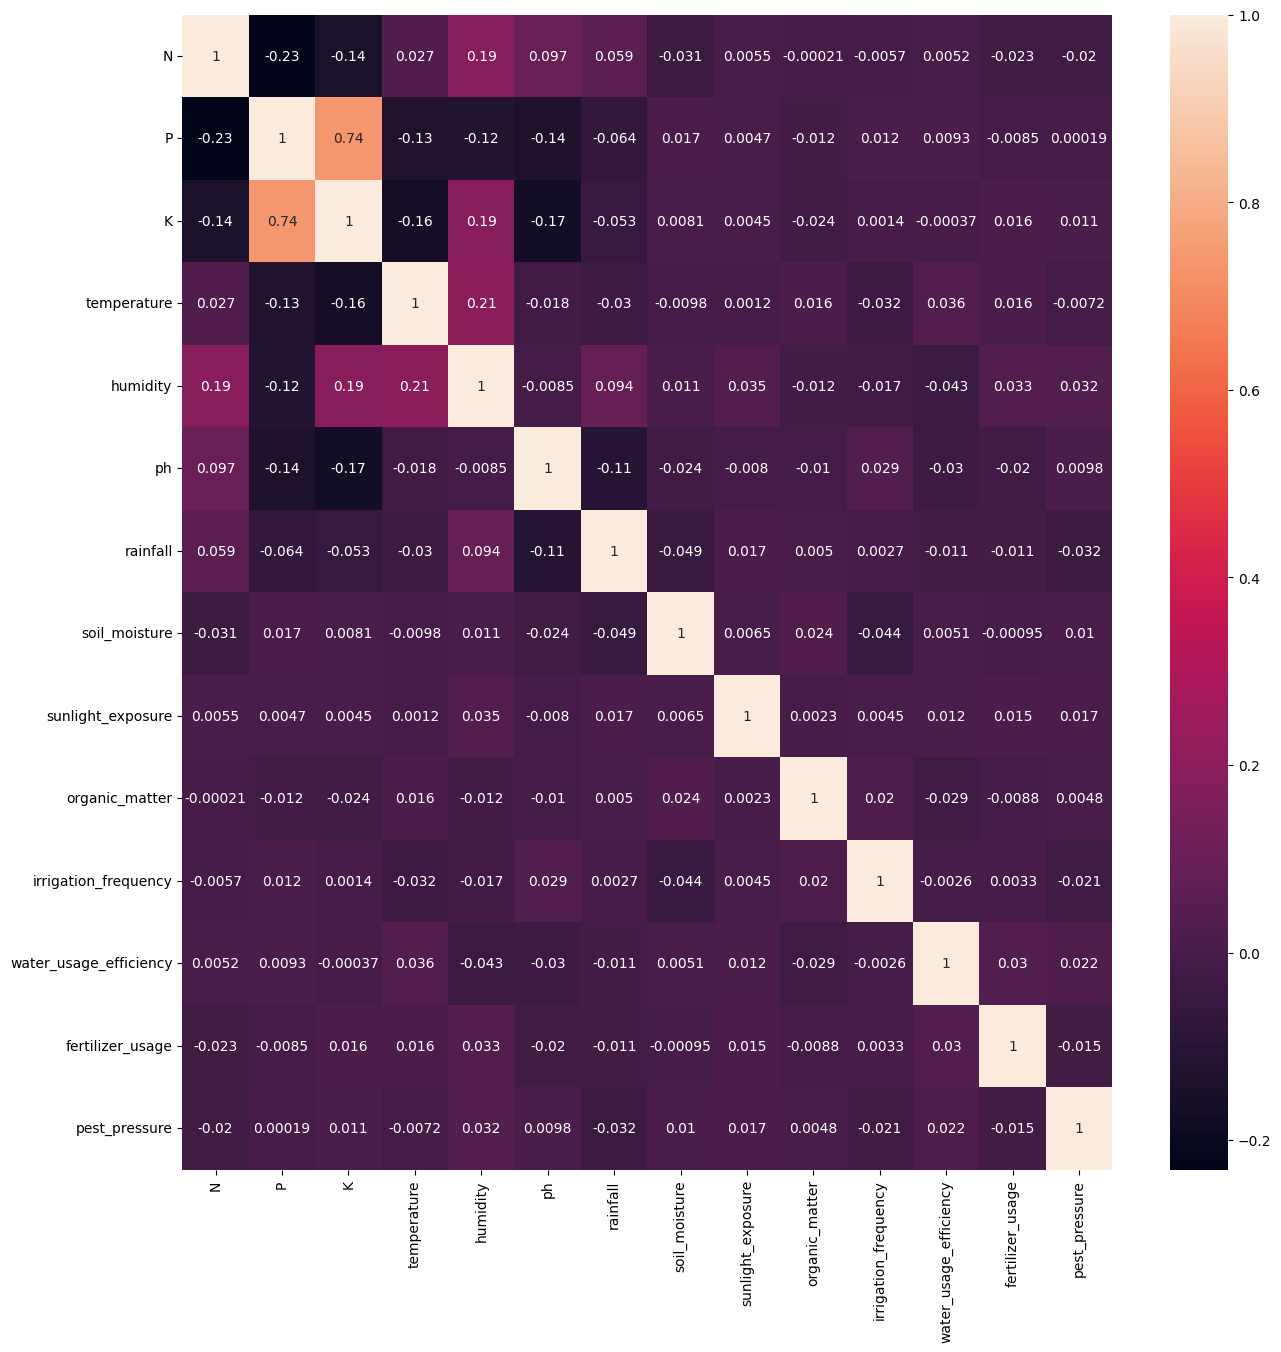

In [152]:
# correlation with heatmap 
s = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sb.heatmap(s , annot = True )

### Cleaning individual columns:

In [153]:
print(crop.dtypes)

label                      object
n                           int64
p                           int64
k                           int64
temperature               float64
humidity                  float64
ph                        float64
rainfall                  float64
soil_moisture             float64
sunlight_exposure         float64
organic_matter            float64
irrigation_frequency        int64
pest_pressure             float64
fertilizer_usage          float64
water_usage_efficiency    float64
dtype: object


In [154]:
crop = crop.round(1)

In [155]:
crop

,label,n,p,k,temperature,humidity,ph,rainfall,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,pest_pressure,fertilizer_usage,water_usage_efficiency
0,rice,90,42,43,20.9,82.0,6.5,202.9,29.4,8.7,3.1,4,57.6,188.2,1.2
1,rice,85,58,41,21.8,80.3,7.0,226.7,12.9,5.8,2.1,4,74.7,71.0,1.8
2,rice,60,55,44,23.0,82.3,7.8,264.0,29.4,9.9,1.5,1,1.0,192.0,3.0
3,rice,74,35,40,26.5,80.2,7.0,242.9,26.2,8.0,8.4,1,24.1,55.8,1.3
4,rice,78,42,42,20.1,81.6,7.6,262.7,28.2,8.1,5.2,3,38.8,185.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.8,66.4,6.8,177.8,10.7,10.3,4.7,5,87.4,185.8,4.1
2196,coffee,99,15,27,27.4,56.6,6.1,127.9,12.2,6.1,4.1,6,37.0,198.5,4.2
2197,coffee,118,33,30,24.1,67.2,6.4,173.3,29.0,11.1,1.6,5,79.7,86.7,2.4
2198,coffee,117,32,34,26.3,52.1,6.8,127.2,13.6,8.1,8.9,6,31.0,72.2,4.1


In [156]:
crop["label"].str.lower()

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [157]:
crop["label"] = crop["label"].str.lower()

In [158]:
crop

,label,n,p,k,temperature,humidity,ph,rainfall,soil_moisture,sunlight_exposure,organic_matter,irrigation_frequency,pest_pressure,fertilizer_usage,water_usage_efficiency
0,rice,90,42,43,20.9,82.0,6.5,202.9,29.4,8.7,3.1,4,57.6,188.2,1.2
1,rice,85,58,41,21.8,80.3,7.0,226.7,12.9,5.8,2.1,4,74.7,71.0,1.8
2,rice,60,55,44,23.0,82.3,7.8,264.0,29.4,9.9,1.5,1,1.0,192.0,3.0
3,rice,74,35,40,26.5,80.2,7.0,242.9,26.2,8.0,8.4,1,24.1,55.8,1.3
4,rice,78,42,42,20.1,81.6,7.6,262.7,28.2,8.1,5.2,3,38.8,185.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.8,66.4,6.8,177.8,10.7,10.3,4.7,5,87.4,185.8,4.1
2196,coffee,99,15,27,27.4,56.6,6.1,127.9,12.2,6.1,4.1,6,37.0,198.5,4.2
2197,coffee,118,33,30,24.1,67.2,6.4,173.3,29.0,11.1,1.6,5,79.7,86.7,2.4
2198,coffee,117,32,34,26.3,52.1,6.8,127.2,13.6,8.1,8.9,6,31.0,72.2,4.1


### Outlier checking:

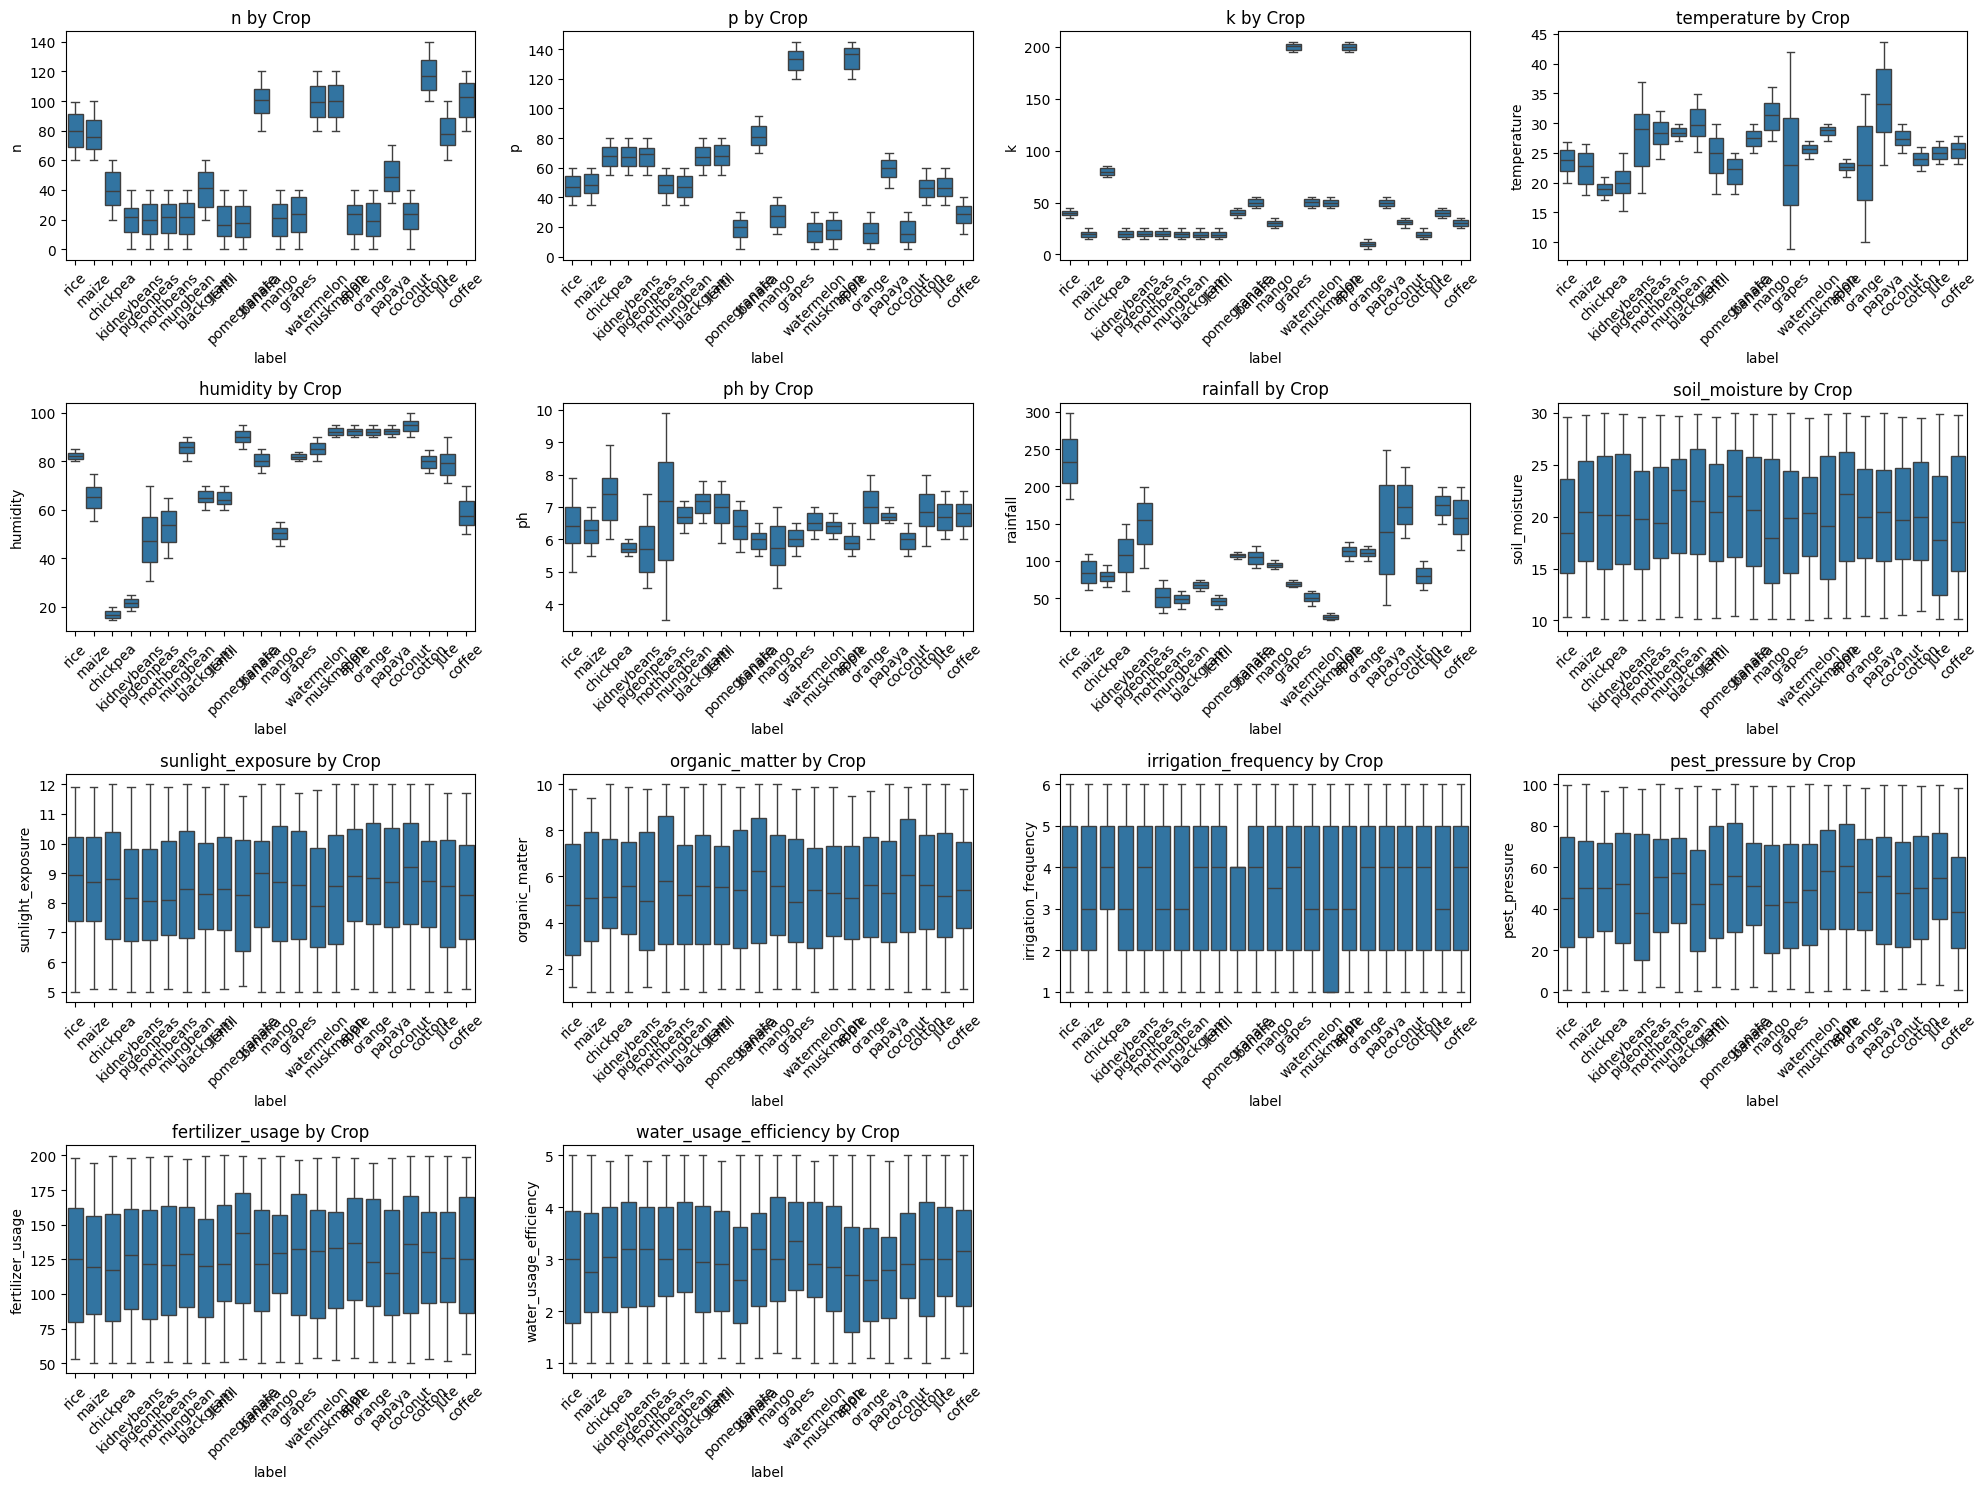

In [159]:
# Set up the figure
plt.figure(figsize=(20, 15))

# Create boxplots for each feature grouped by crop label
for i, column in enumerate(crop.columns.drop('label')):
    plt.subplot(4, 4, i+1)
    sb.boxplot(x='label', y=column, data=crop)
    plt.title(f'{column} by Crop')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### Converting the data into a dictionary for later use:

In [160]:
crop.columns

Index(['label', 'n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall',
       'soil_moisture', 'sunlight_exposure', 'organic_matter',
       'irrigation_frequency', 'pest_pressure', 'fertilizer_usage',
       'water_usage_efficiency'],
      dtype='object')

In [161]:

crop_groups = crop.groupby('label')

# Initialize the target dictionary
crop_db = {}

for crop_name, group in crop_groups:
    crop_db[crop_name] = {
        'soil': {
            'n': tuple(group['n'].agg(['min', 'mean', 'max']).round(1)),
            'p': tuple(group['p'].agg(['min', 'mean', 'max']).round(1)),
            'k': tuple(group['k'].agg(['min', 'mean', 'max']).round(1)),
            'ph': tuple(group['ph'].agg(['min', 'mean', 'max']).round(1)),
            'organic_matter': tuple(group['organic_matter'].agg(['min', 'mean', 'max']).round(1)),
            'soil_moisture': tuple(group['soil_moisture'].agg(['min', 'mean', 'max']).round(1))
        },
        'climate': {
            'temperature': tuple(group['temperature'].agg(['min', 'mean', 'max']).round(1)),
            'humidity': tuple(group['humidity'].agg(['min', 'mean', 'max']).round(1)),
            'rainfall': tuple(group['rainfall'].agg(['min', 'mean', 'max']).round(1)),
            'sunlight_exposure': tuple(group['sunlight_exposure'].agg(['min', 'mean', 'max']).round(1))
        },
        'environmental': {
            'irrigation_frequency': tuple(group['irrigation_frequency'].agg(['min', 'mean', 'max']).round(1)),
            'water_usage_efficiency': tuple(group['water_usage_efficiency'].agg(['min', 'mean', 'max']).round(1)),
            'fertilizer_usage': tuple(group['fertilizer_usage'].agg(['min', 'mean', 'max']).round(1)),
            'pest_pressure': tuple(group['pest_pressure'].agg(['min', 'mean', 'max']).round(1))
        }
    }

In [116]:
crop_db

{'apple': {'soil': {'n': (0.0, 20.8, 40.0),
   'p': (120.0, 134.2, 145.0),
   'k': (195.0, 199.9, 205.0),
   'ph': (5.5, 5.9, 6.5),
   'organic_matter': (1.1, 5.1, 9.5),
   'soil_moisture': (10.2, 21.2, 30.0)},
  'climate': {'temperature': (21.0, 22.6, 24.0),
   'humidity': (90.0, 92.3, 94.9),
   'rainfall': (100.1, 112.7, 125.0),
   'sunlight_exposure': (5.1, 8.8, 12.0)},
  'environmental': {'irrigation_frequency': (1.0, 3.5, 6.0),
   'water_usage_efficiency': (1.0, 2.8, 5.0),
   'fertilizer_usage': (53.5, 131.4, 198.3),
   'pest_pressure': (1.1, 54.3, 99.6)}},
 'banana': {'soil': {'n': (80.0, 100.2, 120.0),
   'p': (70.0, 82.0, 95.0),
   'k': (45.0, 50.0, 55.0),
   'ph': (5.5, 6.0, 6.5),
   'organic_matter': (1.0, 5.8, 10.0),
   'soil_moisture': (10.1, 20.4, 29.9)},
  'climate': {'temperature': (25.0, 27.4, 29.9),
   'humidity': (75.0, 80.4, 85.0),
   'rainfall': (90.1, 104.6, 119.8),
   'sunlight_exposure': (5.0, 8.8, 12.0)},
  'environmental': {'irrigation_frequency': (1.0, 3.5, 6.

### Import the dictionary into a file:

In [162]:
with open('crop_db.txt', 'w') as f:
    f.write(str(crop_db))